In [4]:
import tensorflow as tf
from keras.applications import VGG16, ResNet50, InceptionV3
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 3,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# Set the dimensions of your input images
img_width, img_height = 100, 100

# Specify the pre-trained model you want to use
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
#pretrained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


# Freeze the layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Build a new model and add the pre-trained model as a layer
model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

# Specify the directories of your training and validation datasets
train_dir = '/content/drive/MyDrive/Fundus_Split/train'
val_dir = '/content/drive/MyDrive/Fundus_Split/test'

# Set up data generators to automatically preprocess and augment your images
train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')

# Train the model
history=model.fit(train_generator, steps_per_epoch=train_generator.n // train_generator.batch_size, epochs=20, validation_data=val_generator, validation_steps=val_generator.n // val_generator.batch_size)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Fundus_Split/train'

In [ ]:
# Assuming you have a trained Keras model named 'model'

# Save the model architecture
model.save('/content/drive/MyDrive/Oct_0ROPOUT_Inception.h5')



In [ ]:
import matplotlib.pyplot as plt
import numpy as np


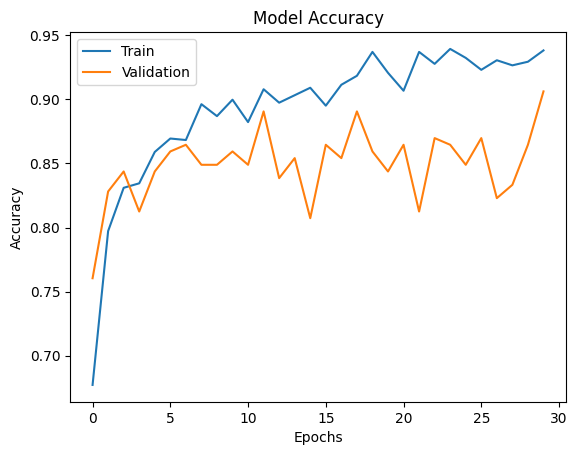

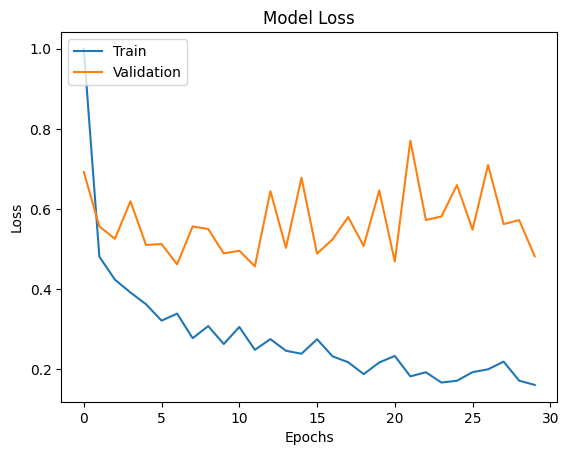

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 223 images belonging to 3 classes.
7/7 [==============================] - 5s 453ms/step


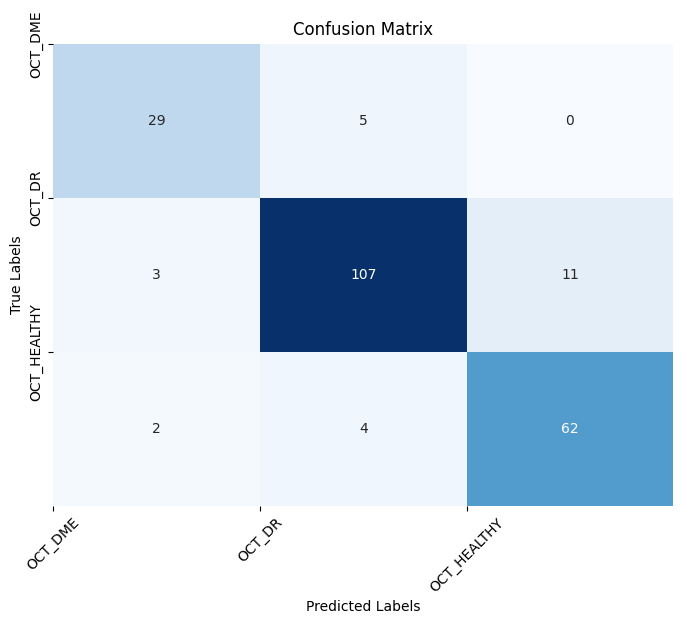

              precision    recall  f1-score   support

     OCT_DME       0.85      0.85      0.85        34
      OCT_DR       0.92      0.88      0.90       121
 OCT_HEALTHY       0.85      0.91      0.88        68

    accuracy                           0.89       223
   macro avg       0.87      0.88      0.88       223
weighted avg       0.89      0.89      0.89       223



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the saved model
model=load_model('/content/drive/MyDrive/Oct_0.001_DROPOUT_Inception.h5')
# Define the image data generator for testing data
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Set the path to your testing data directory
test_data_dir = '/content/drive/MyDrive/Oct_Split/test'

# Set the image dimensions and batch size
img_width, img_height = 100, 100
batch_size = 32

# Create the testing data generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # set to 'categorical' for multiple classes
    shuffle=False  # ensure the order of predictions matches the order of images
)

# Generate predictions from the model
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Generate classification report with zero_division parameter
classification_rep = classification_report(y_true, y_pred, target_names=class_labels, zero_division=1)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_rep)


In [ ]:
model.evaluate(test_generator)


7/7 [==============================] - 6s 603ms/step - loss: 0.5534 - accuracy: 0.8879


[0.5533680319786072, 0.8878923654556274]

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 4608)              0         
                                                                 
 dense_28 (Dense)            (None, 256)               1179904   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 771       
                                                                 
Total params: 15,895,363
Trainable params: 1,180,675
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train_dirf='/content/drive/MyDrive/Fundus_Split/train'
train_diro='/content/drive/MyDrive/Oct_Split/train'
img_width, img_height = 100, 100

train_datagen_fundus = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen_oct = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generatorf = train_datagen_fundus.flow_from_directory(train_dirf, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')
train_generator0 = train_datagen_oct.flow_from_directory(train_diro, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')


Found 1236 images belonging to 3 classes.
Found 890 images belonging to 3 classes.


In [ ]:
val_dirf='/content/drive/MyDrive/Fundus_Split/test'
val_diro='/content/drive/MyDrive/Oct_Split/test'
val_datagenf = ImageDataGenerator(rescale=1.0/255.0)
val_generatorf = val_datagenf.flow_from_directory(val_dirf, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')


val_datageno = ImageDataGenerator(rescale=1.0/255.0)
val_generatoro = val_datageno.flow_from_directory(val_diro, target_size=(img_width, img_height), batch_size=32, class_mode='categorical')

# Load the pre-trained models
model1=load_model('/content/drive/MyDrive/Fundus_InceptionV3_lr0.001.h5')
model2=load_model('/content/drive/MyDrive/OCT_InceptionV3.h5')


Found 310 images belonging to 3 classes.
Found 223 images belonging to 3 classes.


In [ ]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 31,977,347
Trainable params: 8,389,635
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 22,328,099
Trainable params: 525,315
Non-trainable params: 21,802,784
_________________________________________________________________
